# **Case 2**: 2008 Democratic Primaries. Clinton vs Obama


**Team 7** - Abraca-data:

* Muratbekov Maksatbek
* Sarkulov Yerden
* Tolbassy Bakdaulet
* Yegemberdi Nurgeldi
* Zhakypov Aslan

### Data Collection  <a class="anchor" id="section_1_2"></a>
In this particular case we read the data containing all about election.

In [250]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [251]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
# this allows plots to appear directly in the notebook
%matplotlib inline

filepath = r"/content/drive/MyDrive/ElectionDataAlone.csv"

# read data then seperate column by
data= pd.read_csv(filepath)

data.head()

,County,State,Region,FIPS,ElectionDate,ElectionType,TotalVote,Clinton,Obama,MalesPer100Females,AgeBelow35,Age35to65,Age65andAbove,White,Black,Asian,AmericanIndian,Hawaiian,Hispanic,HighSchool,Bachelors,Poverty,IncomeAbove75K,MedianIncome,AverageIncome,UnemployRate,ManfEmploy,SpeakingNonEnglish,Medicare,MedicareRate,SocialSecurity,SocialSecurityRate,RetiredWorkers,Disabilities,DisabilitiesRate,Homeowner,SameHouse1995and2000,Pop,PopDensity,LandArea,FarmArea
0,Adair,IA,Midwest,19001,1/3/2008,Caucuses,75.0,22.0,24.0,96.7,37.7,40.3,21.9,99.2,0.1,0.5,NaN,0.0,0.8,87.8,11.2,9.7,8.6,39568.0,29222.0,3.2,12.916739,2.0,1551.0,19735.0,1825.0,23222.0,1230.0,90.0,1145.0,75.0,66.0,7714,13.5,570.0,373.0
1,Adams,IA,Midwest,19003,1/3/2008,Caucuses,50.0,18.0,7.0,96.8,37.1,40.8,22.1,99.2,NaN,0.2,0.5,0.0,0.6,84.5,12.0,10.6,7.8,35296.0,27297.0,4.6,6.964421,1.6,978.0,22936.0,1110.0,26032.0,720.0,78.0,1829.0,74.7,65.4,4192,9.9,425.0,238.0
2,Allamakee,IA,Midwest,19005,1/3/2008,Caucuses,80.0,25.0,33.0,104.5,41.5,40.8,17.7,99.0,0.2,0.2,0.3,0.0,6.9,81.4,14.4,10.8,10.7,36822.0,25579.0,4.6,16.473466,8.2,2838.0,19294.0,3270.0,22231.0,2245.0,186.0,1265.0,76.4,64.1,14796,23.1,659.0,326.0
3,Appanoose,IA,Midwest,19007,1/3/2008,Caucuses,60.0,17.0,10.0,94.0,42.0,39.2,18.9,98.5,0.7,0.4,0.1,0.0,1.1,81.4,12.2,14.9,6.6,31764.0,23705.0,5.4,15.080881,2.5,3072.0,22479.0,3415.0,24989.0,2050.0,453.0,3315.0,74.0,60.2,13422,27.0,516.0,236.0
4,Audubon,IA,Midwest,19009,1/3/2008,Caucuses,48.0,16.0,17.0,94.7,37.4,40.2,22.5,99.3,0.2,0.2,0.1,0.0,0.6,82.5,12.3,9.2,9.7,38941.0,31100.0,4.1,8.333333,2.7,1472.0,22797.0,1740.0,26947.0,1150.0,79.0,1223.0,79.2,70.4,6278,14.2,444.0,261.0


In [252]:
print("There are", data.shape[0], "rows, and", data.shape[1], "columns in the dataset.")

There are 2868 rows, and 41 columns in the dataset.


<hr>

## Data Preparation <a class="anchor" id="chapter2"></a>

Now you can perform the steps to clean the data.

In [253]:
# Checking the missing values
data.isnull().sum()

County                     0
State                      0
Region                     0
FIPS                       0
ElectionDate               0
ElectionType               0
TotalVote               1131
Clinton                 1131
Obama                   1131
MalesPer100Females         0
AgeBelow35                 0
Age35to65                  0
Age65andAbove              0
White                      0
Black                     80
Asian                     94
AmericanIndian            99
Hawaiian                   0
 Hispanic                  0
HighSchool                 1
Bachelors                  1
Poverty                    1
IncomeAbove75K             2
MedianIncome               1
AverageIncome             30
UnemployRate               1
ManfEmploy               293
SpeakingNonEnglish         1
Medicare                   1
MedicareRate               1
SocialSecurity             1
SocialSecurityRate         1
RetiredWorkers             1
Disabilities               8
DisabilitiesRa

In [254]:
# These are the coolumns (variables) with missing values in it 
data.columns[data.isnull().any()]

Index(['TotalVote', 'Clinton', 'Obama', 'Black', 'Asian', 'AmericanIndian',
       'HighSchool', 'Bachelors', 'Poverty', 'IncomeAbove75K    ',
       'MedianIncome', 'AverageIncome', 'UnemployRate', 'ManfEmploy',
       'SpeakingNonEnglish', 'Medicare', 'MedicareRate', 'SocialSecurity',
       'SocialSecurityRate', 'RetiredWorkers', 'Disabilities',
       'DisabilitiesRate', 'Homeowner', 'SameHouse1995and2000', 'LandArea',
       'FarmArea'],
      dtype='object')

<hr>
Too many variables with missing values

We are going to replace missing (NaN) values **mean** of each numeric column. 

<hr>

In [255]:
# Checking the missing values
data[data.TotalVote.isnull()].head()

,County,State,Region,FIPS,ElectionDate,ElectionType,TotalVote,Clinton,Obama,MalesPer100Females,AgeBelow35,Age35to65,Age65andAbove,White,Black,Asian,AmericanIndian,Hawaiian,Hispanic,HighSchool,Bachelors,Poverty,IncomeAbove75K,MedianIncome,AverageIncome,UnemployRate,ManfEmploy,SpeakingNonEnglish,Medicare,MedicareRate,SocialSecurity,SocialSecurityRate,RetiredWorkers,Disabilities,DisabilitiesRate,Homeowner,SameHouse1995and2000,Pop,PopDensity,LandArea,FarmArea
1737,Hawaii,HI,West,15001,2/19/2008,Caucuses,NaN,NaN,NaN,100.0,46.9,39.7,13.3,35.9,0.7,25.4,0.5,10.6,11.6,84.6,22.1,10.8,20.9,47007.0,26591.0,2.8,NaN,18.4,24383.0,14575.0,29120.0,17407.0,19245.0,3796.0,2269.0,64.5,57.7,171191,42.5,5087.0,821.0
1738,Honolulu,HI,West,15003,2/19/2008,Caucuses,NaN,NaN,NaN,99.1,46.0,39.9,14.1,22.9,3.0,46.6,0.3,8.5,7.1,84.8,27.9,8.8,31.6,59963.0,36828.0,2.3,2.310511,28.9,131700.0,14548.0,140960.0,15571.0,102660.0,16523.0,1825.0,54.6,56.3,909863,1517.0,2127.0,71.0
1739,Kalawao,HI,West,15007,2/19/2008,Caucuses,NaN,NaN,NaN,76.2,4.5,79.2,16.2,41.4,NaN,25.2,NaN,30.6,8.1,39.5,10.2,NaN,NaN,NaN,NaN,NaN,NaN,40.1,44.0,39640.0,NaN,NaN,NaN,NaN,NaN,NaN,90.5,120,9.1,52.0,NaN
1740,Maui,HI,West,15009,2/19/2008,Caucuses,NaN,NaN,NaN,100.9,45.2,43.3,11.4,38.3,0.6,30.2,0.5,10.3,8.7,83.4,22.4,8.3,27.3,54537.0,31156.0,2.3,2.291587,24.1,16718.0,11951.0,19970.0,14276.0,13855.0,1570.0,1122.0,57.6,55.8,141320,121.9,2399.0,257.0
1741,Adams,WI,Midwest,55001,2/19/2008,Primary,NaN,NaN,NaN,116.2,38.9,41.7,19.6,94.9,3.4,0.4,1.0,0.0,2.8,76.7,10.0,13.3,10.3,37434.0,24768.0,6.6,5.601500,4.8,3138.0,15066.0,5850.0,28087.0,4085.0,440.0,2113.0,85.3,59.4,20843,32.2,689.0,124.0


There are nulls in TotalVote above 1737th stroke.

In [256]:
print(data.TotalVote.mean())
print(data.Clinton.mean())
print(data.Obama.mean())

12863.796200345423
5973.738054116292
6178.1226252158895


In [257]:
#display only numeric columns from 6 to 41
data.iloc[:,6:]

,TotalVote,Clinton,Obama,MalesPer100Females,AgeBelow35,Age35to65,Age65andAbove,White,Black,Asian,AmericanIndian,Hawaiian,Hispanic,HighSchool,Bachelors,Poverty,IncomeAbove75K,MedianIncome,AverageIncome,UnemployRate,ManfEmploy,SpeakingNonEnglish,Medicare,MedicareRate,SocialSecurity,SocialSecurityRate,RetiredWorkers,Disabilities,DisabilitiesRate,Homeowner,SameHouse1995and2000,Pop,PopDensity,LandArea,FarmArea
0,75.0,22.0,24.0,96.7,37.7,40.3,21.9,99.2,0.1,0.5,NaN,0.0,0.8,87.8,11.2,9.7,8.6,39568.0,29222.0,3.2,12.916739,2.0,1551.0,19735.0,1825.0,23222.0,1230.0,90.0,1145.0,75.0,66.0,7714,13.5,570.0,373.0
1,50.0,18.0,7.0,96.8,37.1,40.8,22.1,99.2,NaN,0.2,0.5,0.0,0.6,84.5,12.0,10.6,7.8,35296.0,27297.0,4.6,6.964421,1.6,978.0,22936.0,1110.0,26032.0,720.0,78.0,1829.0,74.7,65.4,4192,9.9,425.0,238.0
2,80.0,25.0,33.0,104.5,41.5,40.8,17.7,99.0,0.2,0.2,0.3,0.0,6.9,81.4,14.4,10.8,10.7,36822.0,25579.0,4.6,16.473466,8.2,2838.0,19294.0,3270.0,22231.0,2245.0,186.0,1265.0,76.4,64.1,14796,23.1,659.0,326.0
3,60.0,17.0,10.0,94.0,42.0,39.2,18.9,98.5,0.7,0.4,0.1,0.0,1.1,81.4,12.2,14.9,6.6,31764.0,23705.0,5.4,15.080881,2.5,3072.0,22479.0,3415.0,24989.0,2050.0,453.0,3315.0,74.0,60.2,13422,27.0,516.0,236.0
4,48.0,16.0,17.0,94.7,37.4,40.2,22.5,99.3,0.2,0.2,0.1,0.0,0.6,82.5,12.3,9.2,9.7,38941.0,31100.0,4.1,8.333333,2.7,1472.0,22797.0,1740.0,26947.0,1150.0,79.0,1223.0,79.2,70.4,6278,14.2,444.0,261.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2863,NaN,NaN,NaN,100.6,40.3,40.7,19.0,98.8,0.2,0.2,0.5,0.0,0.5,83.2,17.0,8.9,11.2,39360.0,32864.0,3.1,3.754185,3.7,1730.0,20305.0,1885.0,22124.0,1210.0,73.0,857.0,77.5,65.5,8540,13.8,617.0,348.0
2864,NaN,NaN,NaN,101.0,44.0,43.0,13.1,96.6,0.4,1.7,0.6,0.0,1.8,87.2,26.3,6.9,21.1,51424.0,43056.0,3.5,16.376826,4.1,2172.0,16134.0,2365.0,17568.0,1615.0,76.0,565.0,74.4,54.4,13745,29.9,467.0,277.0
2865,NaN,NaN,NaN,95.2,38.1,40.0,22.0,84.4,NaN,0.2,14.4,0.0,0.7,78.1,15.8,16.0,7.6,31907.0,27248.0,4.2,NaN,9.6,855.0,15562.0,1475.0,26847.0,1000.0,133.0,2421.0,71.3,57.9,5425,7.7,744.0,427.0
2866,NaN,NaN,NaN,105.9,44.0,41.1,14.8,95.8,1.5,0.5,1.6,0.0,2.6,86.1,23.0,12.8,11.0,40371.0,28928.0,3.0,17.977759,5.6,3641.0,16765.0,4190.0,19293.0,2845.0,317.0,1460.0,69.1,54.9,21779,41.8,533.0,342.0


In [258]:
#impute missing variables with mean of each column
from sklearn.impute import SimpleImputer 

imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer = imputer.fit(data.iloc[:,6:])

data.iloc[:,6:] = imputer.transform(data.iloc[:,6:])

#display only numeric columns from 6 to 41
data.iloc[:,6:]

,TotalVote,Clinton,Obama,MalesPer100Females,AgeBelow35,Age35to65,Age65andAbove,White,Black,Asian,AmericanIndian,Hawaiian,Hispanic,HighSchool,Bachelors,Poverty,IncomeAbove75K,MedianIncome,AverageIncome,UnemployRate,ManfEmploy,SpeakingNonEnglish,Medicare,MedicareRate,SocialSecurity,SocialSecurityRate,RetiredWorkers,Disabilities,DisabilitiesRate,Homeowner,SameHouse1995and2000,Pop,PopDensity,LandArea,FarmArea
0,75.0000,22.000000,24.000000,96.7,37.7,40.3,21.9,99.2,0.100000,0.5,1.68931,0.0,0.8,87.8,11.2,9.7,8.6,39568.0,29222.0,3.2,12.916739,2.0,1551.0,19735.0,1825.0,23222.0,1230.0,90.0,1145.0,75.0,66.0,7714.0,13.5,570.0,373.0
1,50.0000,18.000000,7.000000,96.8,37.1,40.8,22.1,99.2,9.900215,0.2,0.50000,0.0,0.6,84.5,12.0,10.6,7.8,35296.0,27297.0,4.6,6.964421,1.6,978.0,22936.0,1110.0,26032.0,720.0,78.0,1829.0,74.7,65.4,4192.0,9.9,425.0,238.0
2,80.0000,25.000000,33.000000,104.5,41.5,40.8,17.7,99.0,0.200000,0.2,0.30000,0.0,6.9,81.4,14.4,10.8,10.7,36822.0,25579.0,4.6,16.473466,8.2,2838.0,19294.0,3270.0,22231.0,2245.0,186.0,1265.0,76.4,64.1,14796.0,23.1,659.0,326.0
3,60.0000,17.000000,10.000000,94.0,42.0,39.2,18.9,98.5,0.700000,0.4,0.10000,0.0,1.1,81.4,12.2,14.9,6.6,31764.0,23705.0,5.4,15.080881,2.5,3072.0,22479.0,3415.0,24989.0,2050.0,453.0,3315.0,74.0,60.2,13422.0,27.0,516.0,236.0
4,48.0000,16.000000,17.000000,94.7,37.4,40.2,22.5,99.3,0.200000,0.2,0.10000,0.0,0.6,82.5,12.3,9.2,9.7,38941.0,31100.0,4.1,8.333333,2.7,1472.0,22797.0,1740.0,26947.0,1150.0,79.0,1223.0,79.2,70.4,6278.0,14.2,444.0,261.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2863,12863.7962,5973.738054,6178.122625,100.6,40.3,40.7,19.0,98.8,0.200000,0.2,0.50000,0.0,0.5,83.2,17.0,8.9,11.2,39360.0,32864.0,3.1,3.754185,3.7,1730.0,20305.0,1885.0,22124.0,1210.0,73.0,857.0,77.5,65.5,8540.0,13.8,617.0,348.0
2864,12863.7962,5973.738054,6178.122625,101.0,44.0,43.0,13.1,96.6,0.400000,1.7,0.60000,0.0,1.8,87.2,26.3,6.9,21.1,51424.0,43056.0,3.5,16.376826,4.1,2172.0,16134.0,2365.0,17568.0,1615.0,76.0,565.0,74.4,54.4,13745.0,29.9,467.0,277.0
2865,12863.7962,5973.738054,6178.122625,95.2,38.1,40.0,22.0,84.4,9.900215,0.2,14.40000,0.0,0.7,78.1,15.8,16.0,7.6,31907.0,27248.0,4.2,10.656417,9.6,855.0,15562.0,1475.0,26847.0,1000.0,133.0,2421.0,71.3,57.9,5425.0,7.7,744.0,427.0
2866,12863.7962,5973.738054,6178.122625,105.9,44.0,41.1,14.8,95.8,1.500000,0.5,1.60000,0.0,2.6,86.1,23.0,12.8,11.0,40371.0,28928.0,3.0,17.977759,5.6,3641.0,16765.0,4190.0,19293.0,2845.0,317.0,1460.0,69.1,54.9,21779.0,41.8,533.0,342.0


In [259]:
# Checking the missing values
data.isnull().sum()

County                  0
State                   0
Region                  0
FIPS                    0
ElectionDate            0
ElectionType            0
TotalVote               0
Clinton                 0
Obama                   0
MalesPer100Females      0
AgeBelow35              0
Age35to65               0
Age65andAbove           0
White                   0
Black                   0
Asian                   0
AmericanIndian          0
Hawaiian                0
 Hispanic               0
HighSchool              0
Bachelors               0
Poverty                 0
IncomeAbove75K          0
MedianIncome            0
AverageIncome           0
UnemployRate            0
ManfEmploy              0
SpeakingNonEnglish      0
Medicare                0
MedicareRate            0
SocialSecurity          0
SocialSecurityRate      0
RetiredWorkers          0
Disabilities            0
DisabilitiesRate        0
Homeowner               0
SameHouse1995and2000    0
Pop                     0
PopDensity  

## Splitting the data to train (*before 19 Feb 2008 inclusive*) and test (*after 19 Feb 2008*) sets

First we should convert `ElectionDate` column to datatime format.

In [260]:
data['ElectionDate'] = pd.to_datetime(data.ElectionDate)

In [261]:
#Splitting the data to train and test
dataTrain = data[data.ElectionDate < '2/19/2008']
dataTest = data[data.ElectionDate >= '2/19/2008']

print("Train set size: ", dataTrain.shape)
print("Test set size: ", dataTest.shape)
dataTrain.head()

Train set size:  (1737, 41)
Test set size:  (1131, 41)


,County,State,Region,FIPS,ElectionDate,ElectionType,TotalVote,Clinton,Obama,MalesPer100Females,AgeBelow35,Age35to65,Age65andAbove,White,Black,Asian,AmericanIndian,Hawaiian,Hispanic,HighSchool,Bachelors,Poverty,IncomeAbove75K,MedianIncome,AverageIncome,UnemployRate,ManfEmploy,SpeakingNonEnglish,Medicare,MedicareRate,SocialSecurity,SocialSecurityRate,RetiredWorkers,Disabilities,DisabilitiesRate,Homeowner,SameHouse1995and2000,Pop,PopDensity,LandArea,FarmArea
0,Adair,IA,Midwest,19001,2008-01-03,Caucuses,75.0,22.0,24.0,96.7,37.7,40.3,21.9,99.2,0.100000,0.5,1.68931,0.0,0.8,87.8,11.2,9.7,8.6,39568.0,29222.0,3.2,12.916739,2.0,1551.0,19735.0,1825.0,23222.0,1230.0,90.0,1145.0,75.0,66.0,7714.0,13.5,570.0,373.0
1,Adams,IA,Midwest,19003,2008-01-03,Caucuses,50.0,18.0,7.0,96.8,37.1,40.8,22.1,99.2,9.900215,0.2,0.50000,0.0,0.6,84.5,12.0,10.6,7.8,35296.0,27297.0,4.6,6.964421,1.6,978.0,22936.0,1110.0,26032.0,720.0,78.0,1829.0,74.7,65.4,4192.0,9.9,425.0,238.0
2,Allamakee,IA,Midwest,19005,2008-01-03,Caucuses,80.0,25.0,33.0,104.5,41.5,40.8,17.7,99.0,0.200000,0.2,0.30000,0.0,6.9,81.4,14.4,10.8,10.7,36822.0,25579.0,4.6,16.473466,8.2,2838.0,19294.0,3270.0,22231.0,2245.0,186.0,1265.0,76.4,64.1,14796.0,23.1,659.0,326.0
3,Appanoose,IA,Midwest,19007,2008-01-03,Caucuses,60.0,17.0,10.0,94.0,42.0,39.2,18.9,98.5,0.700000,0.4,0.10000,0.0,1.1,81.4,12.2,14.9,6.6,31764.0,23705.0,5.4,15.080881,2.5,3072.0,22479.0,3415.0,24989.0,2050.0,453.0,3315.0,74.0,60.2,13422.0,27.0,516.0,236.0
4,Audubon,IA,Midwest,19009,2008-01-03,Caucuses,48.0,16.0,17.0,94.7,37.4,40.2,22.5,99.3,0.200000,0.2,0.10000,0.0,0.6,82.5,12.3,9.2,9.7,38941.0,31100.0,4.1,8.333333,2.7,1472.0,22797.0,1740.0,26947.0,1150.0,79.0,1223.0,79.2,70.4,6278.0,14.2,444.0,261.0


As you see we split the data correctly giving filled null value rows with mean to data test.


## Creating a new columns with Obama's vote margin and etc.

This helps to predict wins or not Obama.

`ObamaMargin` is column that indicates the difference between votes of two candidates, while `ObamaMarginPercent` is a percent of `ObamaMargin` to `TotalVote`. `ObamaWins` is binary column.

In [262]:
dataTrain['ObamaMargin'] = dataTrain.Obama - dataTrain.Clinton
dataTrain['ObamaMarginPercent'] = dataTrain.ObamaMargin / dataTrain.TotalVote
dataTrain['ObamaWins'] = np.where(dataTrain.ObamaMargin > 0, 1, 0)

dataTrain['BlackMargin'] = dataTrain.Black - dataTrain.White
dataTrain['BlackCounty'] = np.where(dataTrain.BlackMargin > 0, 1, 0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [263]:
dataTrain.BlackCounty

0       0
1       0
2       0
3       0
4       0
       ..
1732    0
1733    0
1734    0
1735    0
1736    0
Name: BlackCounty, Length: 1737, dtype: int64

## Data Vizualizations

### How Obama's margin changed over time?

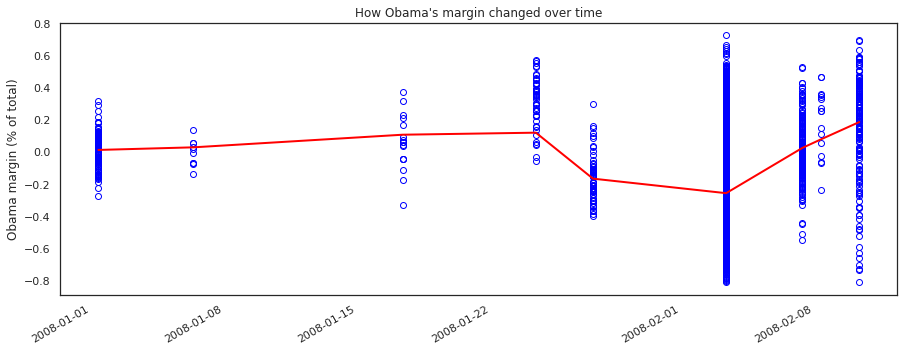

In [264]:
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.figure(figsize=(15,5))
plt.plot(dataTrain.ElectionDate, dataTrain.ObamaMarginPercent, 'o', fillstyle='none', color='blue');
plt.xticks(rotation='30')
plt.ylabel('Obama margin (% of total)')
plt.title("How Obama's margin changed over time")

# calculate a smooth curve through the scatter plot
ys = lowess(dataTrain.ObamaMarginPercent, dataTrain.ElectionDate)[:,1]
_ = plt.plot(dataTrain.ElectionDate, ys,'red',linewidth=2)

# More info on LOWESS: https://stackoverflow.com/questions/23784399/how-to-visualize-a-nonlinear-relationship-in-a-scatter-plot

### What if the county have more blacks than whites? Is that county would vote to Obama? **Yes, absolutely.**

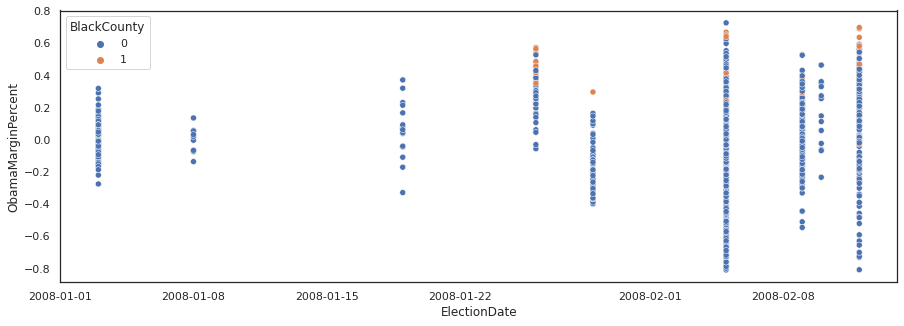

In [265]:
fig, ax = plt.subplots(figsize = (15,5))  

sns.scatterplot(data=dataTrain, x="ElectionDate", y="ObamaMarginPercent", hue="BlackCounty")


Which exhibits have great effects to Obama's Margin percentage?

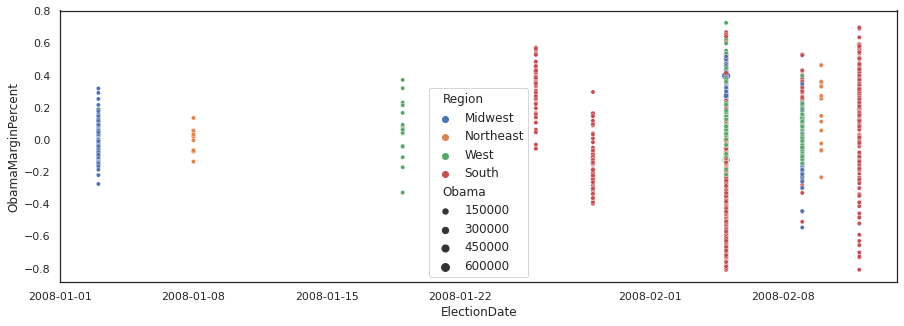

In [266]:
fig, ax = plt.subplots(figsize = (15,5))  

sns.scatterplot(data=dataTrain, x="ElectionDate", y="ObamaMarginPercent", hue="Region", size = 'Obama')

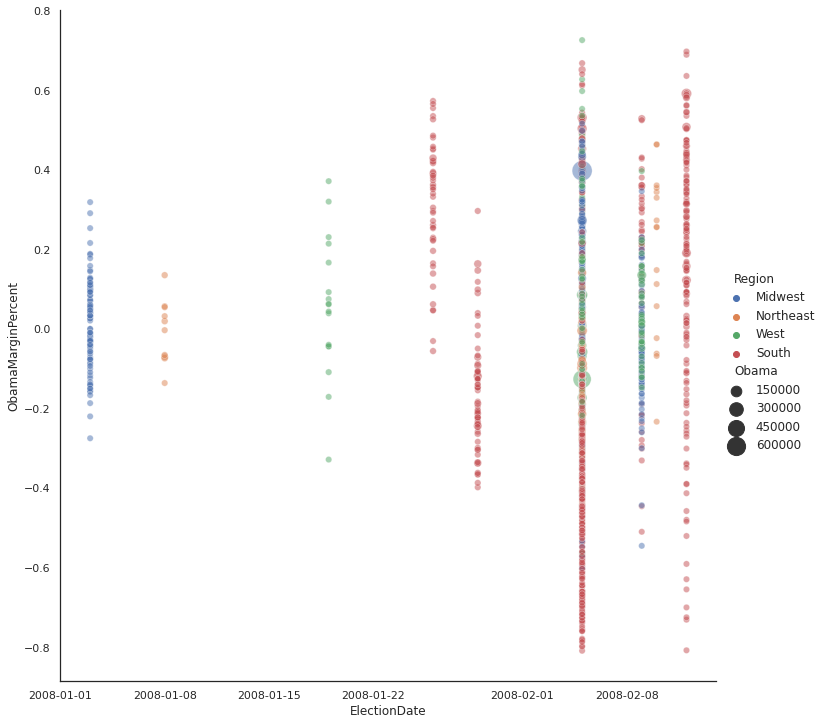

In [267]:
import seaborn as sns
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="ElectionDate", y="ObamaMarginPercent", hue="Region", size="Obama",
            sizes=(40, 400), alpha=.5,
            height=10, data=dataTrain)

## Creating a copy of the data without unnecessary variables

In [268]:
dropFromData = ["County","FIPS","ObamaMargin","Obama","Clinton","TotalVote", "BlackMargin", "BlackCounty"]
election_data = dataTrain.drop(dropFromData, axis = 1)

In [269]:
election_data.head()

,State,Region,ElectionDate,ElectionType,MalesPer100Females,AgeBelow35,Age35to65,Age65andAbove,White,Black,Asian,AmericanIndian,Hawaiian,Hispanic,HighSchool,Bachelors,Poverty,IncomeAbove75K,MedianIncome,AverageIncome,UnemployRate,ManfEmploy,SpeakingNonEnglish,Medicare,MedicareRate,SocialSecurity,SocialSecurityRate,RetiredWorkers,Disabilities,DisabilitiesRate,Homeowner,SameHouse1995and2000,Pop,PopDensity,LandArea,FarmArea,ObamaMarginPercent,ObamaWins
0,IA,Midwest,2008-01-03,Caucuses,96.7,37.7,40.3,21.9,99.2,0.100000,0.5,1.68931,0.0,0.8,87.8,11.2,9.7,8.6,39568.0,29222.0,3.2,12.916739,2.0,1551.0,19735.0,1825.0,23222.0,1230.0,90.0,1145.0,75.0,66.0,7714.0,13.5,570.0,373.0,0.026667,1
1,IA,Midwest,2008-01-03,Caucuses,96.8,37.1,40.8,22.1,99.2,9.900215,0.2,0.50000,0.0,0.6,84.5,12.0,10.6,7.8,35296.0,27297.0,4.6,6.964421,1.6,978.0,22936.0,1110.0,26032.0,720.0,78.0,1829.0,74.7,65.4,4192.0,9.9,425.0,238.0,-0.220000,0
2,IA,Midwest,2008-01-03,Caucuses,104.5,41.5,40.8,17.7,99.0,0.200000,0.2,0.30000,0.0,6.9,81.4,14.4,10.8,10.7,36822.0,25579.0,4.6,16.473466,8.2,2838.0,19294.0,3270.0,22231.0,2245.0,186.0,1265.0,76.4,64.1,14796.0,23.1,659.0,326.0,0.100000,1
3,IA,Midwest,2008-01-03,Caucuses,94.0,42.0,39.2,18.9,98.5,0.700000,0.4,0.10000,0.0,1.1,81.4,12.2,14.9,6.6,31764.0,23705.0,5.4,15.080881,2.5,3072.0,22479.0,3415.0,24989.0,2050.0,453.0,3315.0,74.0,60.2,13422.0,27.0,516.0,236.0,-0.116667,0
4,IA,Midwest,2008-01-03,Caucuses,94.7,37.4,40.2,22.5,99.3,0.200000,0.2,0.10000,0.0,0.6,82.5,12.3,9.2,9.7,38941.0,31100.0,4.1,8.333333,2.7,1472.0,22797.0,1740.0,26947.0,1150.0,79.0,1223.0,79.2,70.4,6278.0,14.2,444.0,261.0,0.020833,1


In [270]:
election_data.shape

(1737, 38)

<hr>

# Supervised Learning: Regression


### Splitting the election_data, which is provided from first train dataset, into train and test sets

As you remember we split the data into train (which does not contain null values) and test datasets, then we split the train dataset to train and test too. This dataset hepls to know the performance of models.

In [271]:
#Create Feature variable X (predictors/independent) and Target variable y (dependent)
y = election_data.ObamaMarginPercent
X = election_data.drop(['State', 'Region', 'ElectionDate', 'ElectionType', 'ObamaMarginPercent', 'ObamaWins'], axis = 1)

In [272]:
#Split the data into training set (70%) and test set (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [273]:
X_test.shape

(522, 32)

Text(0.5, 1.05, 'Pearson Correlation of Features')

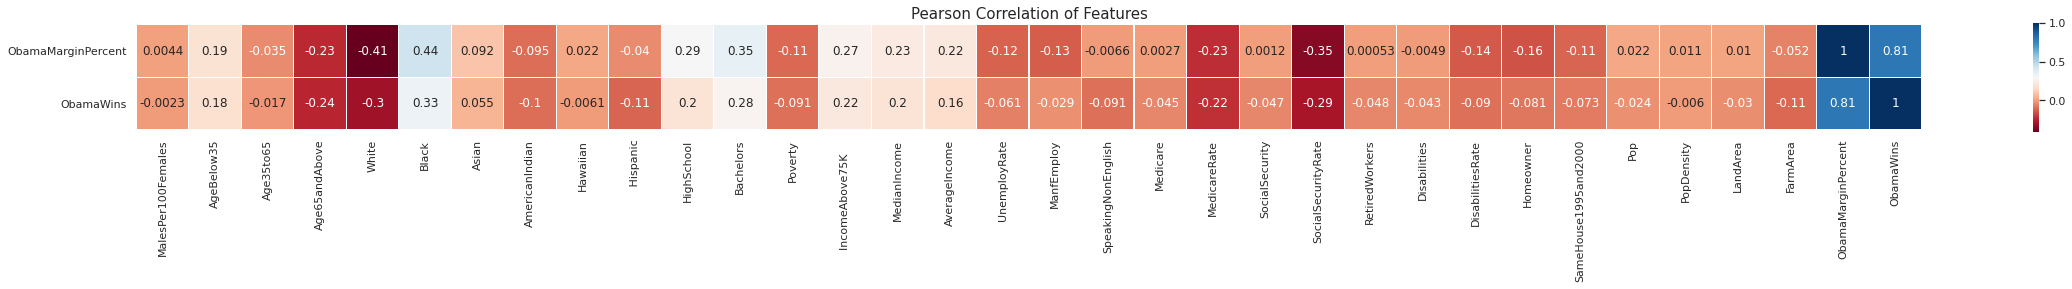

In [274]:
# Compute the correlation matrix 
corr = election_data.corr()
corr = corr[32:]
# Setup the matplotlib figure
f, ax = plt.subplots(figsize=(40,2))

# Generate a custome diverging color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
_ = sns.heatmap(corr, cmap='RdBu', square=True, ax=ax, annot=True, linewidth=0.1)

plt.title('Pearson Correlation of Features', y=1.05, size=15)

Look at the `White` and `Black` on x-axis. Now it is obvious that race of people has the most effects to Obama's Margin Percentage. Top relation rates: `Black`, `White`, `SocialSecurityRate`, `Bachelors`, `HighSchool`.

In [275]:
X.columns

Index(['MalesPer100Females', 'AgeBelow35', 'Age35to65', 'Age65andAbove',
       'White', 'Black', 'Asian', 'AmericanIndian', 'Hawaiian', ' Hispanic',
       'HighSchool', 'Bachelors', 'Poverty', 'IncomeAbove75K    ',
       'MedianIncome', 'AverageIncome', 'UnemployRate', 'ManfEmploy',
       'SpeakingNonEnglish', 'Medicare', 'MedicareRate', 'SocialSecurity',
       'SocialSecurityRate', 'RetiredWorkers', 'Disabilities',
       'DisabilitiesRate', 'Homeowner', 'SameHouse1995and2000', 'Pop',
       'PopDensity', 'LandArea', 'FarmArea'],
      dtype='object')

### Model 1 (the best model)

#### Evalution

To evaluate the performance of models we prefer to use **R-Squared**, **Root Mean Square Error (RMSE)** and **Mean Absolute Error (MAE)**.

In [276]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression


# Sklearn regression model evaluation functions
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


models = [LinearRegression(), KNeighborsRegressor()]

for model in models:
    model.fit(X_train, y_train)

print('Evaluation the models against test data using MAE, RMSE and R2')
for model in models:
    predictions = model.predict(X_test)
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_test, predictions))
    print("    RMSE", np.sqrt(mean_squared_error(y_test, predictions)))
    print("    R2", r2_score(y_test, predictions))

Evaluation the models against test data using MAE, RMSE and R2
LinearRegression
    MAE 0.1521087932625633
    RMSE 0.1980698179330634
    R2 0.5522590196973303
KNeighborsRegressor
    MAE 0.2321398180793533
    RMSE 0.29559421702980815
    R2 0.0028003723196678987


In [277]:
models = []
models.append(("LinearRegression",LinearRegression()))
models.append(("KNRegressor",KNeighborsRegressor()))


for name,model in models:
   kfold = KFold(n_splits=2, random_state=50)
   cv_result = cross_val_score(model,X_test, y_test, cv = kfold,scoring = "r2")
   print(name, cv_result)

LinearRegression [0.47917911 0.53035172]
KNRegressor [0.10005884 0.04327738]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LinearRegression is dominating in all evaluating methods.

#### Predicting with Model 1

In [278]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([ 9.28170009e-02, -2.39172435e-01,  1.22930249e-01,  6.88154195e-02,
        2.50671900e-01,  1.41685758e-01, -2.38052288e-01, -5.24780978e-02,
        1.75438598e-01,  1.04112149e-01, -8.05662771e-02,  1.75864959e-01,
       -1.16875281e-01,  6.26944279e-03,  1.58336502e-01, -4.55317472e-02,
        6.41845872e-03,  4.26604954e-01, -8.78035135e-03, -1.27488653e-01,
       -3.59623767e-01,  2.42282344e-03, -8.30259687e-02,  2.46547059e-02,
        2.43469906e-01, -2.45106871e-01, -1.01181016e-01,  9.94355522e-02,
        1.06278248e-02,  1.42782128e-02, -1.38345811e-01, -7.07655457e-02,
        9.38805489e-02, -4.19858036e-01,  1.55610357e-01, -3.12766568e-01,
       -2.60870932e-01, -1.74933921e-01, -5.48448249e-01, -2.79799771e-02,
       -4.15029829e-01,  1.61246129e-01, -2.51902304e-01, -4.12261500e-01,
       -9.60430770e-02, -8.62809238e-02,  4.77111005e-02,  2.06716117e-01,
       -2.53173984e-01,  2.20253716e-01,  8.19668872e-02,  5.31887022e-01,
       -2.07743637e-01, -

As you see `y_pred` is predicted Obama's margin percents over Hillary Clinton's.

### Model 2

In [279]:

col_names = ['HighSchool', 'Black', 'Bachelors', 'AgeBelow35', 'IncomeAbove75K    ']

models = [LinearRegression(), KNeighborsRegressor()]

print('Check models against training data using MAE, RMSE and R2')
for model in models:
    model.fit(X_train[col_names], y_train)
    predictions = model.predict(X_train[col_names])
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_train, predictions))
    print("    RMSE", np.sqrt(mean_squared_error(y_train, predictions)))
    print("    R2", r2_score(y_train, predictions))


print('--------------------')
print('Evaluation the models against test data using MAE, RMSE and R2')
for model in models:
    model.fit(X_train[col_names], y_train)
    predictions = model.predict(X_test[col_names])
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_test, predictions))
    print("    RMSE", np.sqrt(mean_squared_error(y_test, predictions)))
    print("    R2", r2_score(y_test, predictions))

Check models against training data using MAE, RMSE and R2
LinearRegression
    MAE 0.17327071356800475
    RMSE 0.21500517829394786
    R2 0.5059527324648443
KNeighborsRegressor
    MAE 0.1283583757587347
    RMSE 0.1650272525792668
    R2 0.708940351203974
--------------------
Evaluation the models against test data using MAE, RMSE and R2
LinearRegression
    MAE 0.16730506744766163
    RMSE 0.21455674771148098
    R2 0.474618717980379
KNeighborsRegressor
    MAE 0.15942900216944986
    RMSE 0.2089907053786861
    R2 0.5015240788022222


### Model 3

In [280]:

col_names = ['Age65andAbove', 'White', 'Black',  'Bachelors', 'HighSchool']

models = [LinearRegression(), KNeighborsRegressor()]

print('Check models against training data using MAE, RMSE and R2')
for model in models:
    model.fit(X_train[col_names], y_train)
    predictions = model.predict(X_train[col_names])
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_train, predictions))
    print("    RMSE", np.sqrt(mean_squared_error(y_train, predictions)))
    print("    R2", r2_score(y_train, predictions))


print('--------------------')
print('Evaluation the models against test data using MAE, RMSE and R2')
for model in models:
    model.fit(X_train[col_names], y_train)
    predictions = model.predict(X_test[col_names])
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_test, predictions))
    print("    RMSE", np.sqrt(mean_squared_error(y_test, predictions)))
    print("    R2", r2_score(y_test, predictions))

Check models against training data using MAE, RMSE and R2
LinearRegression
    MAE 0.17400323393435685
    RMSE 0.21587929487744423
    R2 0.5019274082454767
KNeighborsRegressor
    MAE 0.1306092269543179
    RMSE 0.1689049988399089
    R2 0.695101233110642
--------------------
Evaluation the models against test data using MAE, RMSE and R2
LinearRegression
    MAE 0.1673601385806225
    RMSE 0.21419279958603002
    R2 0.47639959283715383
KNeighborsRegressor
    MAE 0.16120866791644708
    RMSE 0.2166434870415814
    R2 0.4643494986128689


### Model 4 

In [281]:

col_names = ['Age65andAbove', 'White', 'MedicareRate']
models = [LinearRegression(), KNeighborsRegressor()]

print('Check models against training data using MAE, RMSE and R2')
for model in models:
    model.fit(X_train[col_names], y_train)
    predictions = model.predict(X_train[col_names])
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_train, predictions))
    print("    RMSE", np.sqrt(mean_squared_error(y_train, predictions)))
    print("    R2", r2_score(y_train, predictions))


print('--------------------')
print('Evaluation the models against test data using MAE, RMSE and R2')
for model in models:
    model.fit(X_train[col_names], y_train)
    predictions = model.predict(X_test[col_names])
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_test, predictions))
    print("    RMSE", np.sqrt(mean_squared_error(y_test, predictions)))
    print("    R2", r2_score(y_test, predictions))

Check models against training data using MAE, RMSE and R2
LinearRegression
    MAE 0.2264726098812209
    RMSE 0.275091963964614
    R2 0.1912273251044312
KNeighborsRegressor
    MAE 0.20509784674946416
    RMSE 0.2542188567127043
    R2 0.309305202902753
--------------------
Evaluation the models against test data using MAE, RMSE and R2
LinearRegression
    MAE 0.21631670558071833
    RMSE 0.266783992113127
    R2 0.18771249081157426
KNeighborsRegressor
    MAE 0.2534728563963949
    RMSE 0.3154224049526063
    R2 -0.1354690957887601


### Model 5

In [282]:
col_names = ['AgeBelow35', 'MalesPer100Females', 'LandArea']
models = [LinearRegression(), KNeighborsRegressor()]

print('Check models against training data using MAE, RMSE and R2')
for model in models:
    model.fit(X_train[col_names], y_train)
    predictions = model.predict(X_train[col_names])
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_train, predictions))
    print("    RMSE", np.sqrt(mean_squared_error(y_train, predictions)))
    print("    R2", r2_score(y_train, predictions))


print('--------------------')
print('Evaluation the models against test data using MAE, RMSE and R2')
for model in models:
    model.fit(X_train[col_names], y_train)
    predictions = model.predict(X_test[col_names])
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_test, predictions))
    print("    RMSE", np.sqrt(mean_squared_error(y_test, predictions)))
    print("    R2", r2_score(y_test, predictions))

Check models against training data using MAE, RMSE and R2
LinearRegression
    MAE 0.24452392306017684
    RMSE 0.29880965356334843
    R2 0.04575496263290424
KNeighborsRegressor
    MAE 0.20603229747470292
    RMSE 0.2552308132340202
    R2 0.30379542870763654
--------------------
Evaluation the models against test data using MAE, RMSE and R2
LinearRegression
    MAE 0.23539544334329005
    RMSE 0.2949695717361642
    R2 0.007010454053860582
KNeighborsRegressor
    MAE 0.24918764150934575
    RMSE 0.3138920809139422
    R2 -0.12447799045414398


Model 1 has greater performance as it trained with more different columns.

<hr>

# Unsupervised Learning

## Principal Component Analysis

In [283]:
# Let's split the election_data again so that we get all available data
X_train = election_data.iloc[:, 4:37]
X_train.head(3)

,MalesPer100Females,AgeBelow35,Age35to65,Age65andAbove,White,Black,Asian,AmericanIndian,Hawaiian,Hispanic,HighSchool,Bachelors,Poverty,IncomeAbove75K,MedianIncome,AverageIncome,UnemployRate,ManfEmploy,SpeakingNonEnglish,Medicare,MedicareRate,SocialSecurity,SocialSecurityRate,RetiredWorkers,Disabilities,DisabilitiesRate,Homeowner,SameHouse1995and2000,Pop,PopDensity,LandArea,FarmArea,ObamaMarginPercent
0,96.7,37.7,40.3,21.9,99.2,0.100000,0.5,1.68931,0.0,0.8,87.8,11.2,9.7,8.6,39568.0,29222.0,3.2,12.916739,2.0,1551.0,19735.0,1825.0,23222.0,1230.0,90.0,1145.0,75.0,66.0,7714.0,13.5,570.0,373.0,0.026667
1,96.8,37.1,40.8,22.1,99.2,9.900215,0.2,0.50000,0.0,0.6,84.5,12.0,10.6,7.8,35296.0,27297.0,4.6,6.964421,1.6,978.0,22936.0,1110.0,26032.0,720.0,78.0,1829.0,74.7,65.4,4192.0,9.9,425.0,238.0,-0.220000
2,104.5,41.5,40.8,17.7,99.0,0.200000,0.2,0.30000,0.0,6.9,81.4,14.4,10.8,10.7,36822.0,25579.0,4.6,16.473466,8.2,2838.0,19294.0,3270.0,22231.0,2245.0,186.0,1265.0,76.4,64.1,14796.0,23.1,659.0,326.0,0.100000


## Feature Scaling

In [284]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)

### Decide on the number of components

The number of components in PCA can be decided after checking variance with respect to `no_components`. Let’s see some of common ways of checking the components.

### Plot No_components & Variance Graph

In [285]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA

# number features in original data (= 590)
X_train.shape

(1737, 33)

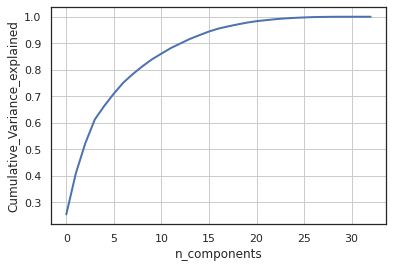

In [286]:
pca=PCA()  
pca.n_components=33  
pca_data=pca.fit_transform(X_train)

percentage_var_explained = pca.explained_variance_ratio_  
cum_var_explained=np.cumsum(percentage_var_explained) #plot PCA spectrum   

plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained, linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

In [287]:
# look at explainded variance of PCA components 
exp_var_cumsum = pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)  

for index, var in enumerate(exp_var_cumsum):  
    print('When n_components = %d,   variance=%f' %(index,np.round(var,3)))

When n_components = 0,   variance=25.430000
When n_components = 1,   variance=40.870000
When n_components = 2,   variance=52.290000
When n_components = 3,   variance=61.260000
When n_components = 4,   variance=66.390000
When n_components = 5,   variance=71.010000
When n_components = 6,   variance=75.160000
When n_components = 7,   variance=78.400000
When n_components = 8,   variance=81.290000
When n_components = 9,   variance=83.920000
When n_components = 10,   variance=86.080000
When n_components = 11,   variance=88.200000
When n_components = 12,   variance=89.930000
When n_components = 13,   variance=91.630000
When n_components = 14,   variance=93.060000
When n_components = 15,   variance=94.420000
When n_components = 16,   variance=95.540000
When n_components = 17,   variance=96.350000
When n_components = 18,   variance=97.100000
When n_components = 19,   variance=97.780000
When n_components = 20,   variance=98.330000
When n_components = 21,   variance=98.710000
When n_components = 

When n_components = 13,   variance=91.630000

From above we can see that n_components=13 explains 91.6% of variance

### Passing %Variance as Input parameter to PCA()

In [288]:
#Let's say you would like to explain 90% variance  
pca=PCA(.90)  
pca.fit(X_train)  

print('Number of components to explain 90% Variance is', pca.n_components_)

Number of components to explain 90% Variance is 14


In [289]:
# applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 14)
X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [290]:
#pca.explained_variance_ratio_
#pca.explained_variance_ratio_.cumsum()
print("Components = ", pca.n_components_ , 
       ";\nTotal explained variance = ", round(pca.explained_variance_ratio_.sum(),5)  )

Components =  14 ;
Total explained variance =  0.91631


In [291]:
X_train.shape

(1737, 14)